In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

seed = 999
np.random.seed(seed)
tf.random.set_seed(seed)

# 학습목표
- 손글씨 숫제 데이터 전처리
- 신경망 학습
    - 베스트 모델 저장
    - 학습 중단 기능 구현
    - 최종 모델 저장
- 학습 결과 시각화
- 저장된 모델을 가져오기
- 가져온 모델을 이용해서 예측
- 실제 손글씨 숫자 데이터를 만들어서 예측
- 과적합 방지를 위한 Dropout 사용하기

# 손글씨 숫자 이미지 데이터
- 미국/영국의 공무원을 대상으로 만든 데이터 셋
- 60000개의 훈련데이터, 10,000개의 테스트 데이터로 구성
- 라벨은 0~9로 구성
- 이미지 데이터는 28*28 크기의 흑백 이미지로 구성(0,255만으로 구성)로 구성

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train.shape,y_train.shape,X_test.shape,y_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

5


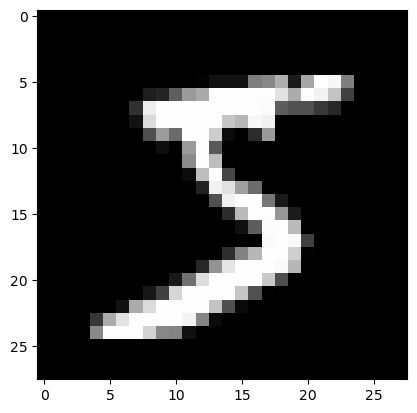

In [3]:
print(y_train[0])
plt.imshow(X_train[0],cmap="gray")
plt.show()

- 전처리
    - Dense층 1차원 입력을 받는데 이미지는 2차원 데이터-> 2차원 데이터를 1차원으로 변환
    - 0-255범위의 값을 0.0-1.0으로 정규화 -> 성능 향상

In [4]:
# 2차원 -> 1차원
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [5]:
# 최대값으로 나누어 0.0-1.0 사이로 변환
X_train = X_train/255.0
X_test = X_test/255.0

# 라벨을 원핫인코딩

In [6]:
y_train_en = pd.get_dummies(y_train)
y_test_en = pd.get_dummies(y_test)

y_train_en.shape,y_test_en.shape

((60000, 10), (10000, 10))

# 신경망 설계
    - 입력층, 은닉층, 출력층을 1개씩만 사용
    - 활성화 함수 : relu

In [15]:
m1 = Sequential()
m1.add(Dense(units=64,input_dim=784,activation="relu"))
m1.add(Dense(units=32))
m1.add(Dense(units=10,activation="softmax"))
m1.summary()

c:\Users\SMHRD\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
m1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
h1 = m1.fit(X_train,y_train_en,batch_size=160,epochs=10)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.7976 - loss: 0.7161
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.9427 - loss: 0.1977
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.9592 - loss: 0.1394
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.9680 - loss: 0.1092
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9738 - loss: 0.0898
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9786 - loss: 0.0747
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9820 - loss: 0.0634
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.9851 - loss: 0.0542
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.9870 - loss: 0.0466
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.9890 - loss: 0.0403


In [17]:
import os

# 모델 폴더 생성
model_dir = "./model"

# os.path.exists() : 해당 폴더가 있다면 True로 반환
# not : 해당 폴더가 없다면
if not os.path.exists(model_dir):
    os.mkdir(model_dir)


In [18]:
#모델 저장
m1.save("./model/m1_mnist_last.h5")

# 저장된 모델 불러오기

In [19]:
from tensorflow.keras.models import load_model

m2 = load_model("./model/m1_mnist_last.h5")

# 예측

In [24]:
pred = m2.predict(X_test[210:211])
print(pred)
print("예측값 : ",pred.argmax())
print("실제값 : ",y_test[210])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[5.7721237e-09 2.8367515e-09 3.2530834e-09 2.7853414e-08 9.9988222e-01
  4.2343765e-07 5.0700169e-07 3.6069185e-05 4.6151435e-08 8.0805068e-05]]
예측값 :  4
실제값 :  4


# 잘못 찾는 데이터 검색

In [26]:
pred = m2.predict(X_test)
count = 0
for i in range(len(pred)):
    if pred[i].argmax() != y_test[i]:
        count += 1
        print(i,pred[i].argmax(), y_test[i])
print(count)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
115 9 4
241 8 9
247 2 4
259 0 6
321 7 2
340 3 5
381 7 3
391 2 8
445 0 6
447 9 4
495 2 8
582 2 8
591 3 8
610 2 4
655 2 8
691 4 8
707 9 4
717 6 0
726 9 7
844 7 8
877 6 8
895 2 0
938 5 3
947 9 8
951 4 5
956 2 1
965 0 6
1014 5 6
1039 2 7
1044 8 6
1107 3 9
1112 6 4
1181 1 6
1191 7 0
1226 2 7
1232 4 9
1242 9 4
1247 5 9
1251 1 2
1272 4 5
1283 2 7
1289 9 5
1299 7 5
1319 3 8
1325 6 8
1393 3 5
1433 3 8
1500 1 7
1522 9 7
1530 7 8
1549 2 4
1553 3 9
1609 6 2
1621 6 0
1641 6 5
1681 7 3
1709 3 9
1717 0 8
1737 1 5
1751 2 4
1754 2 7
1774 5 8
1790 4 2
1800 2 6
1828 7 3
1850 7 8
1878 3 8
1901 4 9
1903 2 7
1955 2 8
1984 0 2
1987 9 0
2004 3 8
2016 2 7
2033 4 0
2043 8 4
2053 9 4
2073 6 5
2109 7 3
2118 0 6
2129 2 9
2130 9 4
2135 1 6
2182 2 1
2189 1 9
2224 8 5
2272 0 8
2291 7 5
2293 0 9
2329 2 0
2343 7 1
2369 9 5
2387 1 9
2395 3 8
2406 1 9
2408 9 3
2414 7 9
2422 4 6
2488 6 2
2607 2 7
2618 5 3
2648 0 9
2654 1 6
2770 2 3
2850 3 5
2877 7 4
2896 0 8
2915 3 7
2921 2 3
292

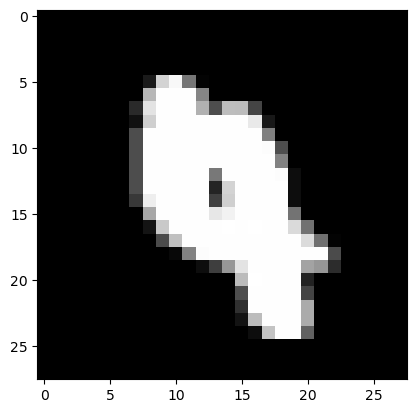

In [31]:
# 시각화 하기 위해서 784로 된 이미지를 28,28로 변환
plt.imshow(X_test[8527].reshape(28,28),cmap="gray")
plt.show()

- 베스트모델 저장
    - 가장 좋은 모델이 최종 모델과 일치하지 않는 경우 가장 좋은 모델을 반복시 마다 저장하는 것
    - ModelCheckpoint() 사용
        - filepath : 파일명
        - monitor : 베스트모델일 기준
        - save_best_only : True이면 베스트모델인 경우에만 저장, False이면 모든 모델을 다 저장
- 학습 중단
    - 학습이 설정된 반복수동안 더 나아지지 않는다면 학습을 중지하는 기능
    - EarlyStopping() 사용
        - monitor : 학습중단 조건
        - patience : 기준이 더 좋아지지 않더라도 대기하는 반복 수
        

In [32]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [37]:
# 파일명 형식 설정
# epoch:03d : epoch변수 값을 정수형 3자리로 표시, 자리수가 적으면 오른쪽에 0을 채워서 표시
# loss:.3f : loss 키 값을 소수점 3째짜리로 표시
# 파일명 형태 : mnist_best_003_89.06_88.45.hdf5
filename = "./model/mnist_best_{epoch:03d}_{loss:.3f}_{val_loss:.3f}.keras"

# 베스트모델 저장 설정
mc = ModelCheckpoint(filepath=filename,monitor="val_loss",save_best_only=True)

# 학습중단 기능 설정
# monitor 값은 ModelCheckpoint의 monitor 값과 동일한 갓ㅂ을 사용
# val_loss 값이 5회동안 더 좋아지지 않으면 학습을 중단
es = EarlyStopping(monitor="val_loss", patience=5)


h2 = m1.fit(X_train,y_train_en, epochs=10, batch_size=128, validation_split=0.2, callbacks=[mc,es])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9781 - val_loss: 0.1107
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9983 - loss: 0.0054 - val_accuracy: 0.9805 - val_loss: 0.0976
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9803 - val_loss: 0.1052
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9988 - loss: 0.0046 - val_accuracy: 0.9743 - val_loss: 0.1403
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.9785 - val_loss: 0.1247
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0044 - val_accuracy: 0.9785 - val_loss: 0.1213
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9789 - val_loss: 0.1183


In [39]:
# 모델 불러오기
bs_model = load_model("./model/mnist_best_001_0.006_0.111.keras")

In [40]:
bs_model.evaluate(X_test,y_test_en)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.9735 - loss: 0.1712


[0.15101094543933868, 0.9739999771118164]

In [41]:
import PIL.Image as img

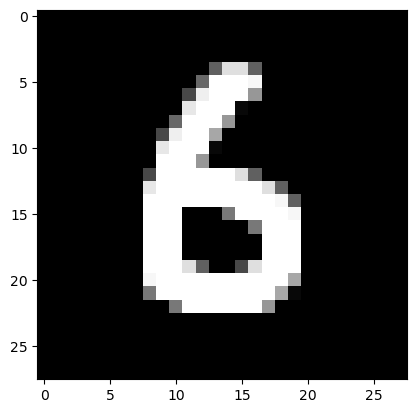

In [51]:
# 이미지 불러오기
# convert('L') : 칼라 이미지를 흑백이미지로 변환
num_img = img.open("./data/6.png").convert("L")
num_img = np.array(num_img)

plt.imshow(num_img,cmap="gray")
plt.show()

- 훈련데이터와 동일한 전처리
    - 2차원 -> 1차원
    - 정규화

In [52]:
test_img = num_img.reshape(-1,28*28)
test_img.shape

(1, 784)

In [53]:
test_img = test_img/255.0

- 예측

In [54]:
pred = bs_model.predict(test_img)
print("출력결과 : ",pred)
print("예측값 : ",pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
출력결과 :  [[3.3253254e-16 4.3917904e-20 3.7985183e-19 4.2039513e-19 1.9549631e-15
  8.3341329e-06 9.9999166e-01 1.2910004e-28 1.9878826e-08 1.0642370e-17]]
예측값 :  6


- 과적합 감소 방법 : Drop out
    - 해당 층에서 학습에 참여하지 안흔 퍼셉트론의 비율을 설정
    - 반복 시마다 Dropout되는 퍼셉트론 다름(랜덤)
    - Dropout 비율은 0.5이하로 설정
        - 설계한 신경망 층의 특성을 유지하도록 하기 위해
    - Dropout의 위치는 층 사이의 파라미터의 수가 크게 차이 나는 곳에 배치
    